# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [4]:
import sys

In [5]:
sys.path

['/media/huyen/DATA4/My documents/Current works/ThinkBayes2/notebooks',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/huyen/.local/share/virtualenvs/ThinkBayes2-zPCo6w7q/lib/python3.8/site-packages',
 '/home/huyen/.local/share/virtualenvs/ThinkBayes2-zPCo6w7q/lib/python3.8/site-packages/IPython/extensions',
 '/home/huyen/.ipython']

In [86]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite
import thinkplot
from matplotlib import pyplot

## The cookie problem

Here's the original statement of the cookie problem:

> Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each.

> Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

If we only draw one cookie, this problem is simple, but if we draw more than one cookie, there is a complication: do we replace the cookie after each draw, or not?

If we replace the cookie, the proportion of vanilla and chocolate cookies stays the same, and we can perform multiple updates with the same likelihood function.

If we *don't* replace the cookie, the proportions change and we have to keep track of the number of cookies in each bowl.

**Exercise:**

Modify the solution from the book to handle selection without replacement.

Hint: Add instance variables to the `Cookie` class to represent the hypothetical state of the bowls, and modify the `Likelihood` function accordingly.

To represent the state of a Bowl, you might want to use the `Hist` class from `thinkbayes2`.

#### 1. Solution for basic cookie problem

In [2]:
pmf = Pmf()


Pmf({})

In [3]:
## Set Prior probability: 
pmf.Set(x = 'Bowl1', y = 0.5)
pmf.Set(x = 'Bowl2', y = 0.5)

In [4]:
pmf.Total()

1.0

In [5]:
# Multiply prior to likelihood as factor 
pmf.Mult('Bowl1', factor = 30/40)
pmf.Mult('Bowl2', factor = 20/40)

In [6]:
pmf.GetDict()

{'Bowl1': 0.375, 'Bowl2': 0.25}

In [7]:
pmf.Total()

0.625

In [8]:
pmf.Normalize()

0.625

In [9]:
pmf.Total()

1.0

In [10]:
# Get poterior 
pmf.GetDict()

{'Bowl1': 0.6000000000000001, 'Bowl2': 0.4}

#### 2. 

In [11]:
# Solution goes here
class Cookie(Suite):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.

        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Likelihood(self, data, hypo):
        """The likelihood of the data under the hypothesis.

        data: string cookie type
        hypo: dictionary of cookie type within a bowl
        """
        likelihood = hypo[data]/hypo.Total()

        if likelihood:
            hypo[data] -=1
        
        return likelihood

In [41]:
# Solution goes here
Bowl1 = Hist(dict(vanilla= 30, chocolate = 10))
Bowl2 = Hist(dict(vanilla= 20, chocolate = 20))

Hist({'vanilla': 20, 'chocolate': 20})

In [42]:
Bowl1["vanilla"]

30

In [43]:
suite = Cookie([Bowl1, Bowl2])

print('After 1 vanilla')

suite.Update('vanilla')

for hypo, prob in suite.Items():
    print(hypo, prob)


After 1 vanilla
Hist({'vanilla': 29, 'chocolate': 10}) 0.6000000000000001
Hist({'vanilla': 19, 'chocolate': 20}) 0.4


In [44]:
suite.GetDict()

{Hist({'vanilla': 29, 'chocolate': 10}): 0.6000000000000001,
 Hist({'vanilla': 19, 'chocolate': 20}): 0.4}

In [45]:
for i in range(11):
    suite.Update('chocolate')
    print(suite.GetDict())

{Hist({'vanilla': 29, 'chocolate': 9}): 0.4285714285714286, Hist({'vanilla': 19, 'chocolate': 19}): 0.5714285714285714}
{Hist({'vanilla': 29, 'chocolate': 8}): 0.2621359223300971, Hist({'vanilla': 19, 'chocolate': 18}): 0.7378640776699028}
{Hist({'vanilla': 29, 'chocolate': 7}): 0.13636363636363635, Hist({'vanilla': 19, 'chocolate': 17}): 0.8636363636363635}
{Hist({'vanilla': 29, 'chocolate': 6}): 0.06104651162790699, Hist({'vanilla': 19, 'chocolate': 16}): 0.9389534883720931}
{Hist({'vanilla': 29, 'chocolate': 5}): 0.023800528900642243, Hist({'vanilla': 19, 'chocolate': 15}): 0.9761994710993579}
{Hist({'vanilla': 29, 'chocolate': 4}): 0.008061420345489446, Hist({'vanilla': 19, 'chocolate': 14}): 0.9919385796545106}
{Hist({'vanilla': 29, 'chocolate': 3}): 0.002316602316602318, Hist({'vanilla': 19, 'chocolate': 13}): 0.9976833976833978}
{Hist({'vanilla': 29, 'chocolate': 2}): 0.0005355548943766738, Hist({'vanilla': 19, 'chocolate': 12}): 0.9994644451056234}
{Hist({'vanilla': 29, 'chocol

####  2. Train problem
Extend the Train class in the case of multiple locomotives and compare the results

In [76]:
# Solution goes here
def TotalTrains(N):
    """ Return a total number of train 
    Assumption: There are N companies, each company take a different value from 1~N
    """
    hypo = dict()
    for i in range(1, N + 1):
        hypo[i] = N - i + 1
    return hypo

class Train(Suite):
    """Represents hypotheses about how many train companies

    The likelihood function is updated
    """
    def Likelihood(self, data, hypo):
        """
        data: the number of the observed trained
        hypo: the hypothesis regarding companies and their number of trains
        return: P(data|hypo) : probability of observing the train provided the number of company
        """
        train_numbers = TotalTrains(hypo)
        if (data in train_numbers):
            return 1.0/train_numbers[data]
        else:
            return 0
        

In [89]:
# Solution goes here
hypos = range(1, 1001)
suite = Train(hypos)

data = 60
suite.Update(data)

0.007424690060004179

No handles with labels found to put in legend.


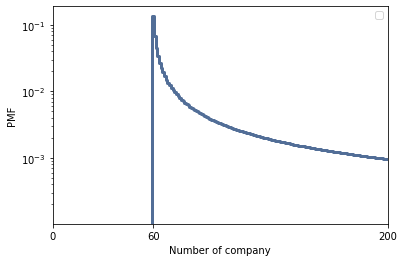

<Figure size 576x432 with 0 Axes>

In [100]:
# Solution goes here
thinkplot.Pmf(suite)
thinkplot.Show(xlabel = "Number of company", ylabel = 'PMF', xticks = [0, 60, 200], xlim = [0, 200], yscale = 'log')
# pyplot.yscale('log')

In [92]:
suite.Mean()

185.73929718211954

In [ ]:
Conclusion: Compared to one compaby case, it is more likely to observe the smaller number of companies